## **EDA for Numerical Data**

In this notebook, we perform Exploratory Data Analysis (EDA) for the numerical variables.

In [46]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [47]:
csv_data = pd.read_csv("datasets\\cleaned-data.csv")

In [48]:
numeric_data = pd.DataFrame(csv_data[['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']])
cat_data = pd.DataFrame(csv_data[['Survived', 'Pclass', 'Sex', 'Embarked', 'Alone']])

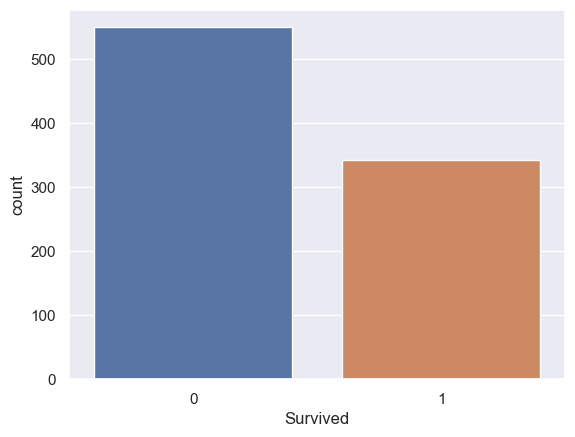

Survived: 342
Dead: 549
Survived %: 38.38
Dead %: 61.62
Ratio Survive:Dead 342:549


In [49]:
sb.countplot(x ='Survived', data=csv_data)
plt.show()
survived_count = csv_data['Survived'].sum()
dead_count = csv_data['Survived'].count() - survived_count
print(f"Survived: {survived_count}\nDead: {dead_count}\nSurvived %: {(survived_count/csv_data['Survived'].count() * 100):.2f}\nDead %: {(100 - (survived_count/csv_data['Survived'].count() * 100)):.2f}")
print(f"Ratio Survive:Dead {survived_count}:{dead_count}")

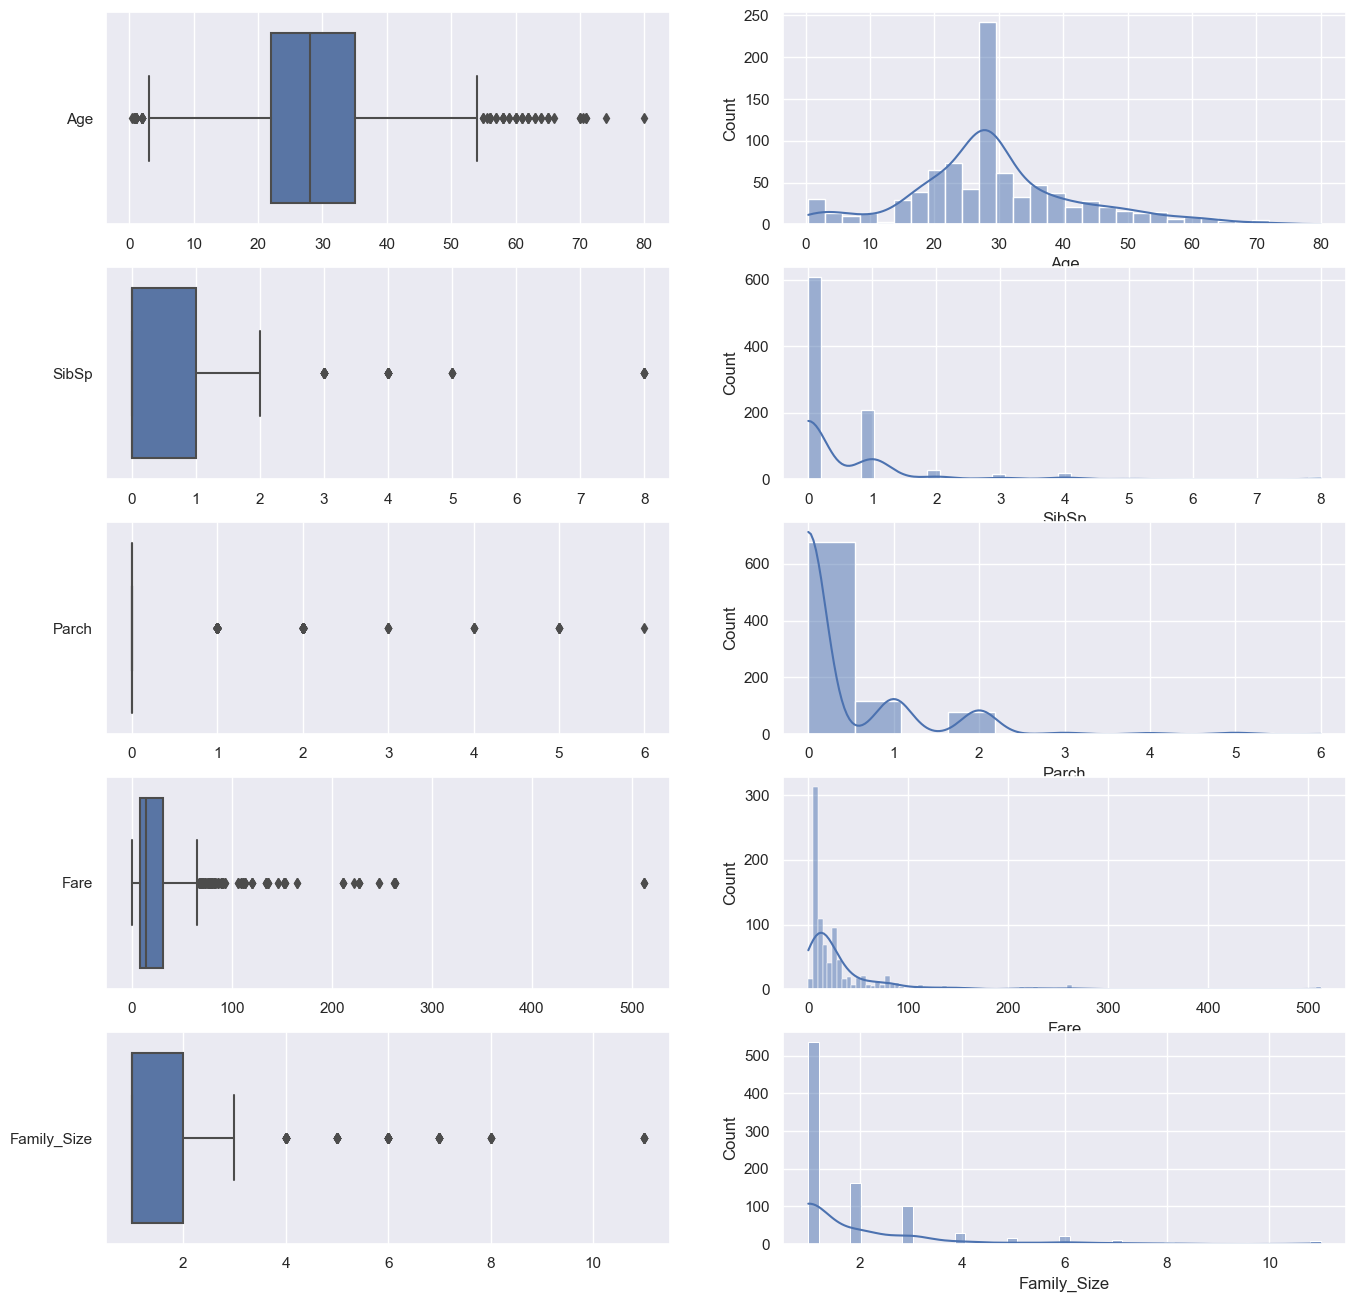

In [50]:
f, axes = plt.subplots(5, 2, figsize=(16, 16))
num = 0
for i in numeric_data:
    # Box-Plot
    sb.boxplot(data=pd.DataFrame(numeric_data[i]), orient='h', ax=axes[num][0])
    sb.histplot(data=numeric_data[i], ax=axes[num][1], kde=True)
    num+=1

In [51]:
numeric_data['Age'].skew()

0.5102446555756495

The above shows the boxplots and distributions of all the numeric variables. We can see that there are many outliers present and `Age` has quite a distribution that appears to be near normal distribution with a slight postive skew.

We then compare numeric variables against `Survived`.

<AxesSubplot:xlabel='Family_Size', ylabel='Survived'>

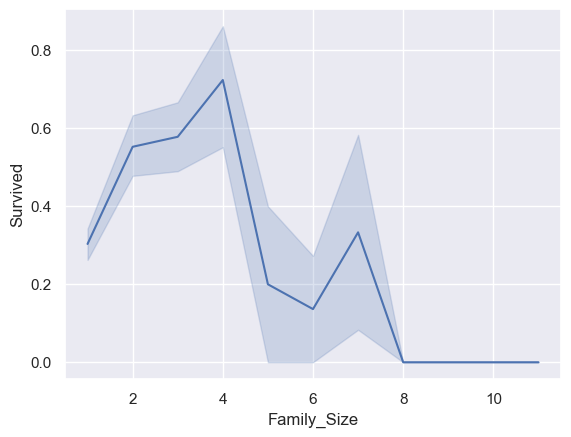

In [52]:
sb.lineplot(x ='Family_Size', y ='Survived', data = csv_data)

From the line graph comparing family size to survival, we see that the chance of survival is lower as the family size increases generally. This shows that `Family_Size` could be a good predictor.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

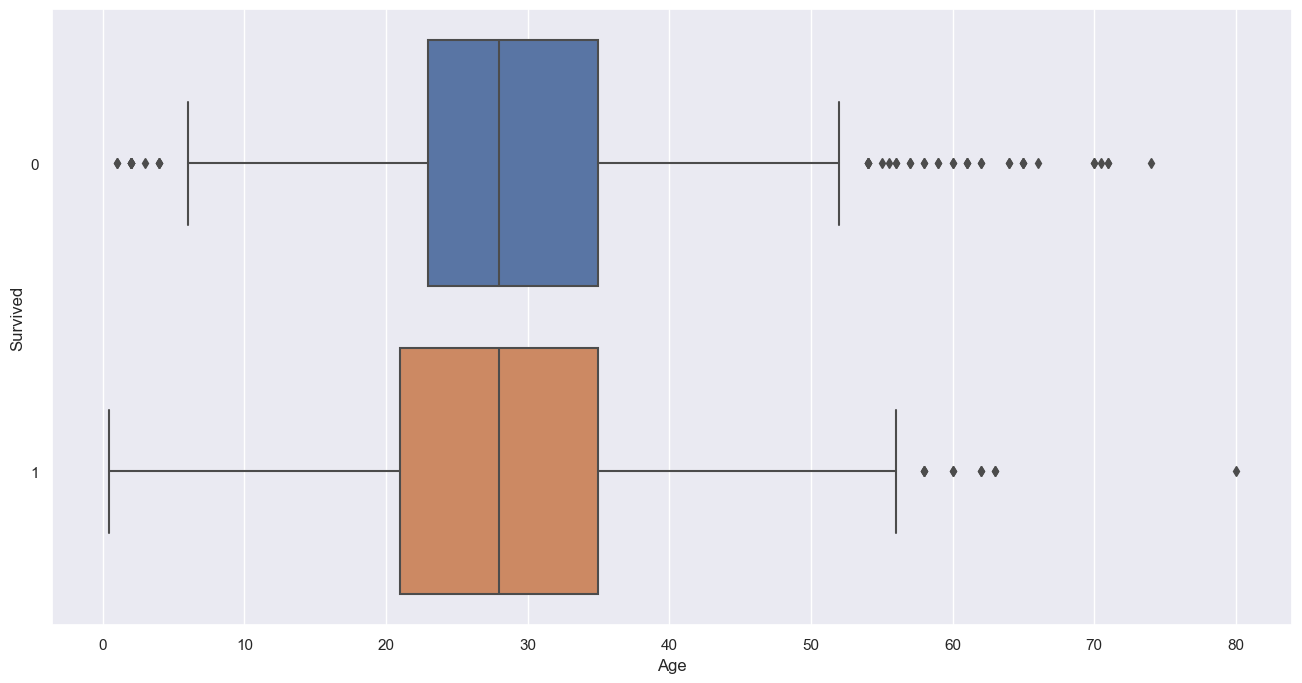

In [53]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Age', y = 'Survived', orient='h', data = csv_data)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

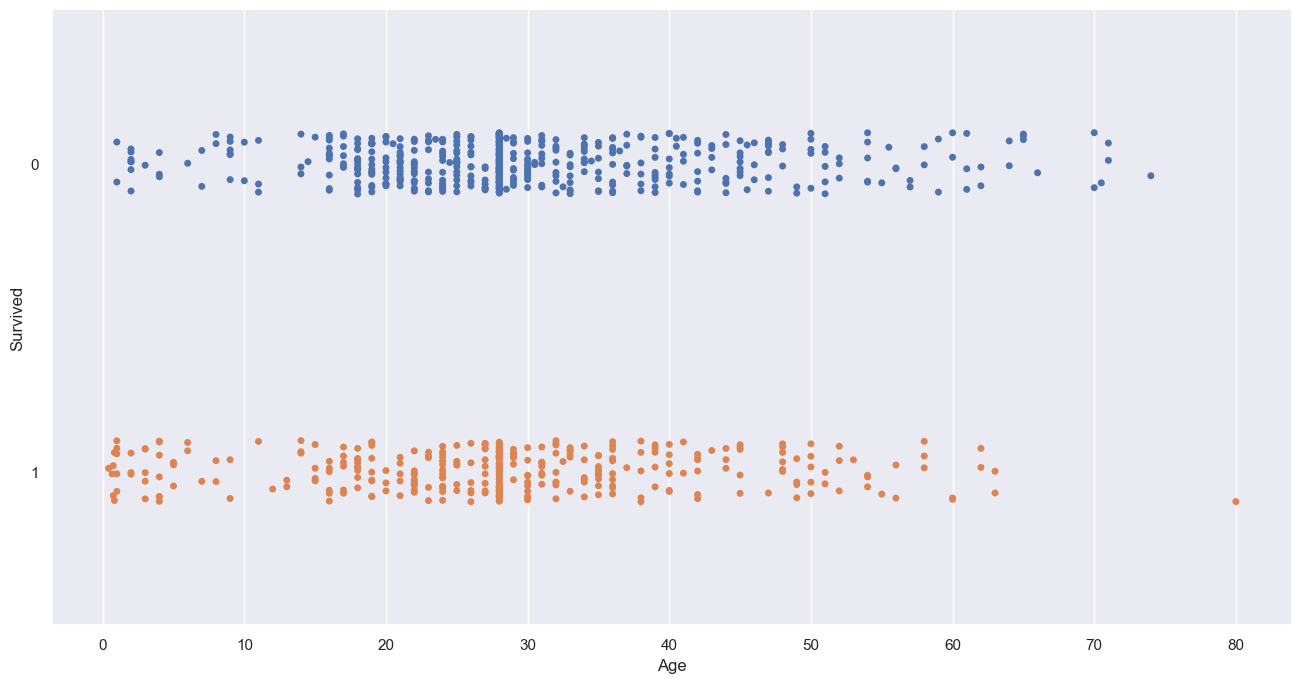

In [54]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'Survived', orient='h', data = csv_data)

From the boxplot and stripplots of `Age` against `Survived`, we see that that `Age` is not really a good predictor.

In [55]:
pd.crosstab([csv_data.SibSp],csv_data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

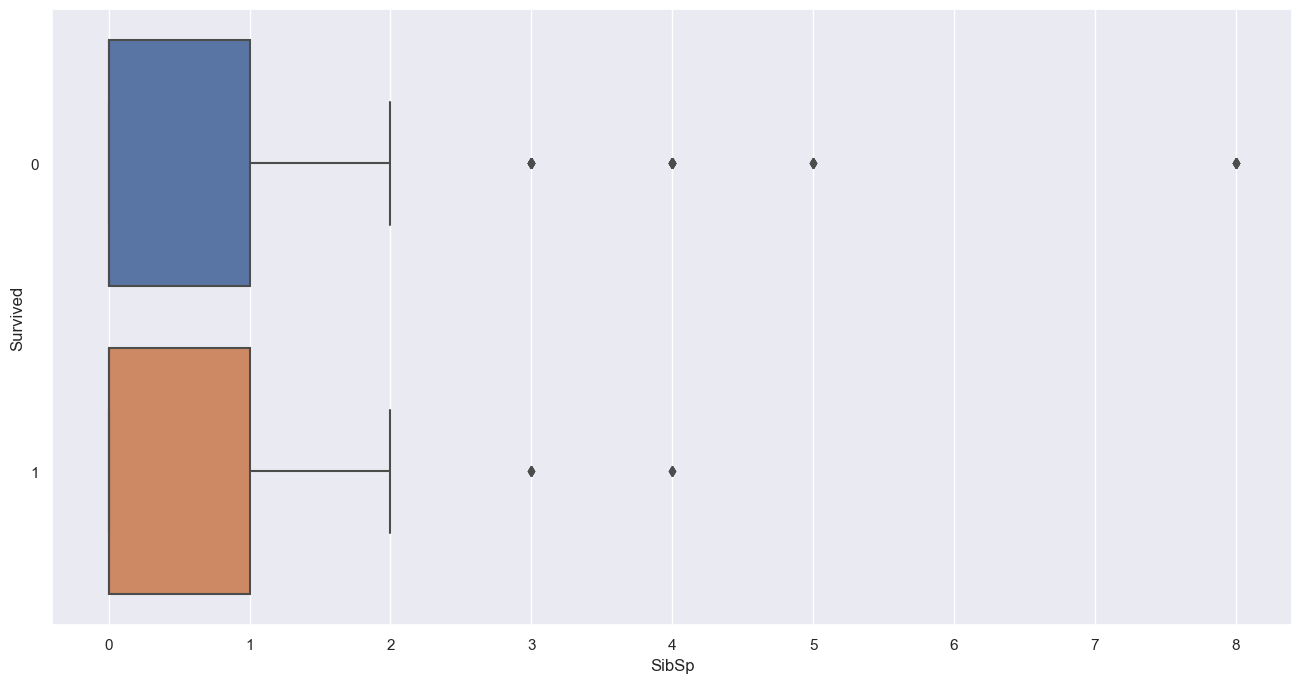

In [56]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'SibSp', y = 'Survived', orient='h', data = csv_data)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

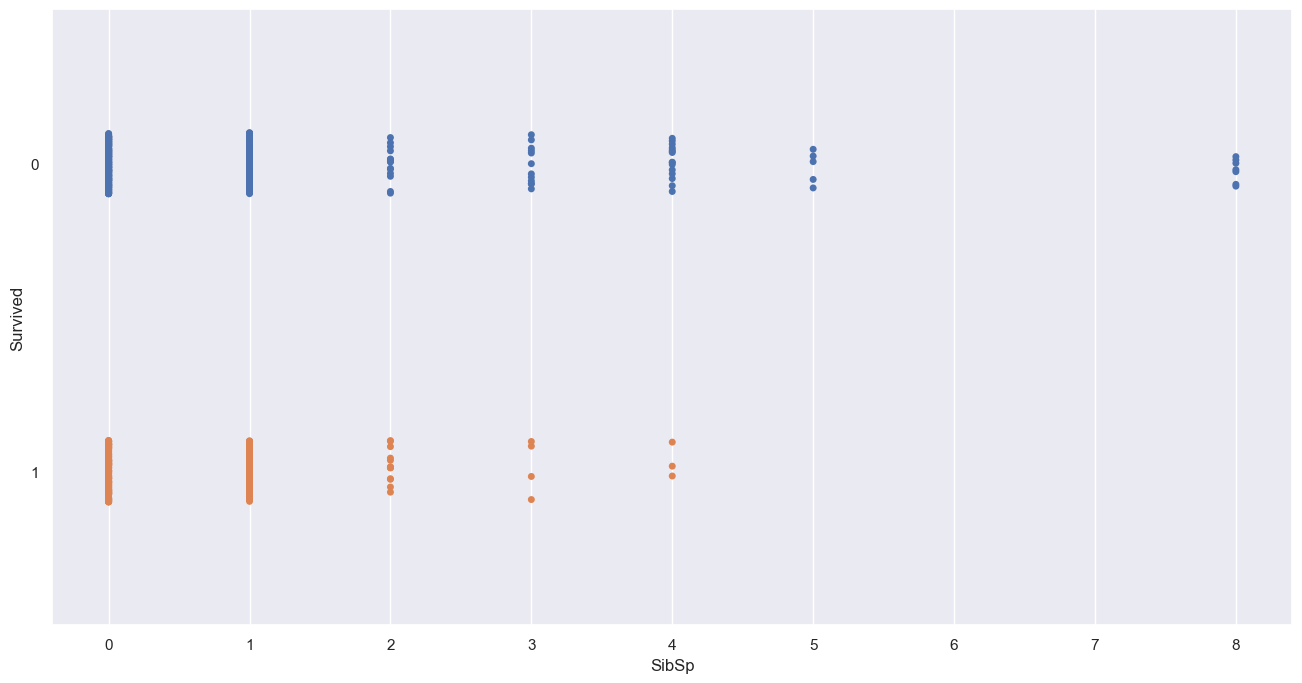

In [57]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'SibSp', y = 'Survived', orient='h', data = csv_data)

Similar to `Age`, `Sibsp` plots also show that it is not a very good predictor.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

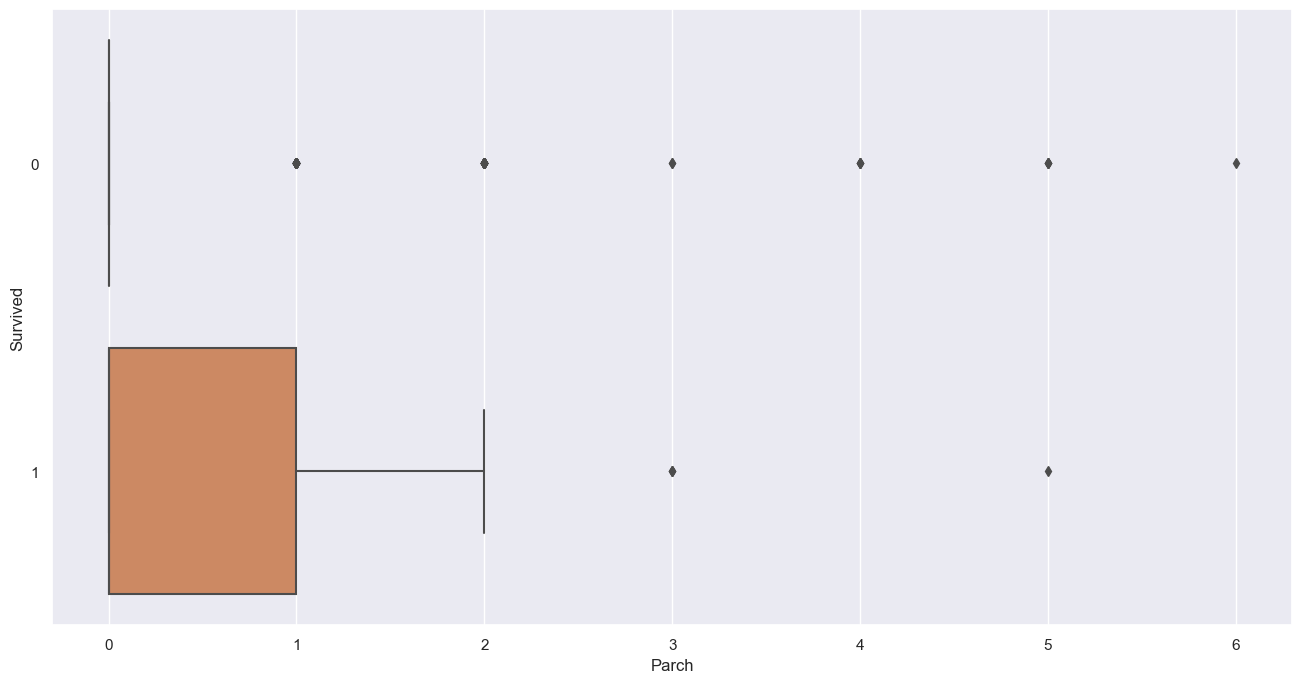

In [58]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Parch', y = 'Survived', orient='h', data = csv_data)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

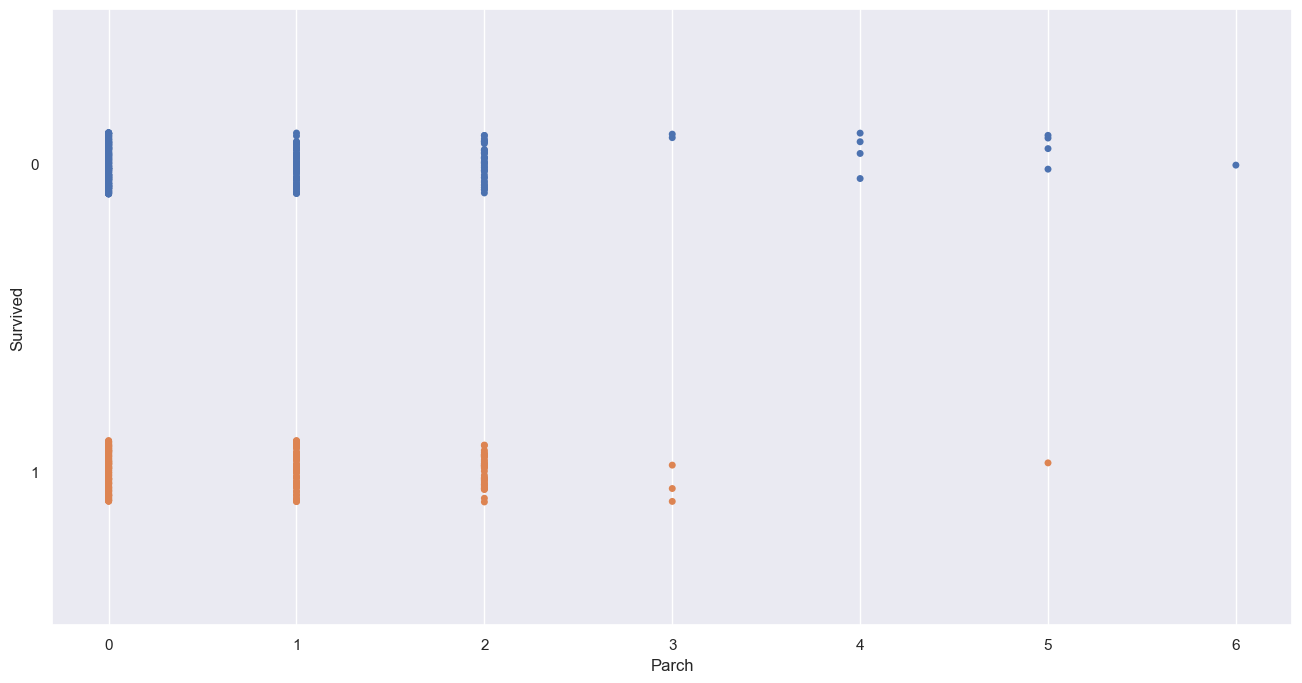

In [59]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Parch', y = 'Survived', orient='h', data = csv_data)

The boxplots of `Parch` against `Survived` look quite different and thus could be a predictor.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

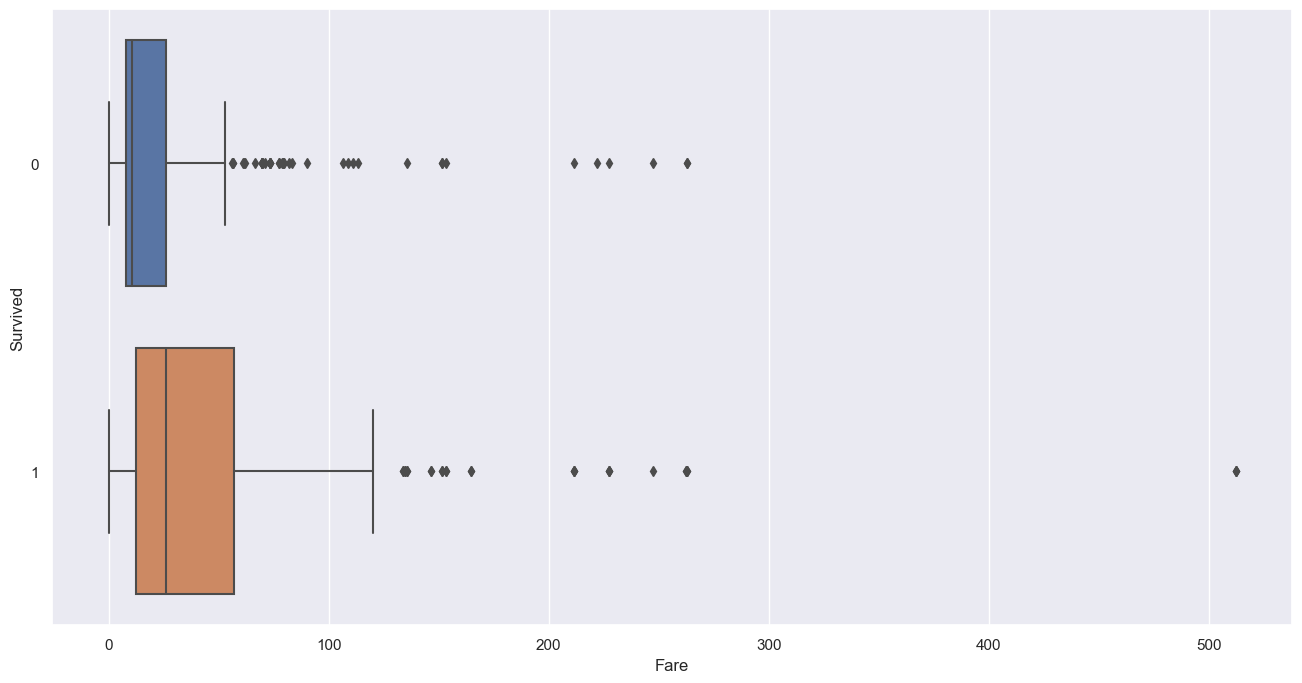

In [60]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Fare', y = 'Survived', orient='h', data = csv_data)

We see that the boxplots of `Fare` against `Survived` has a very drastic difference and therefore `Fare` would be an important predictor.

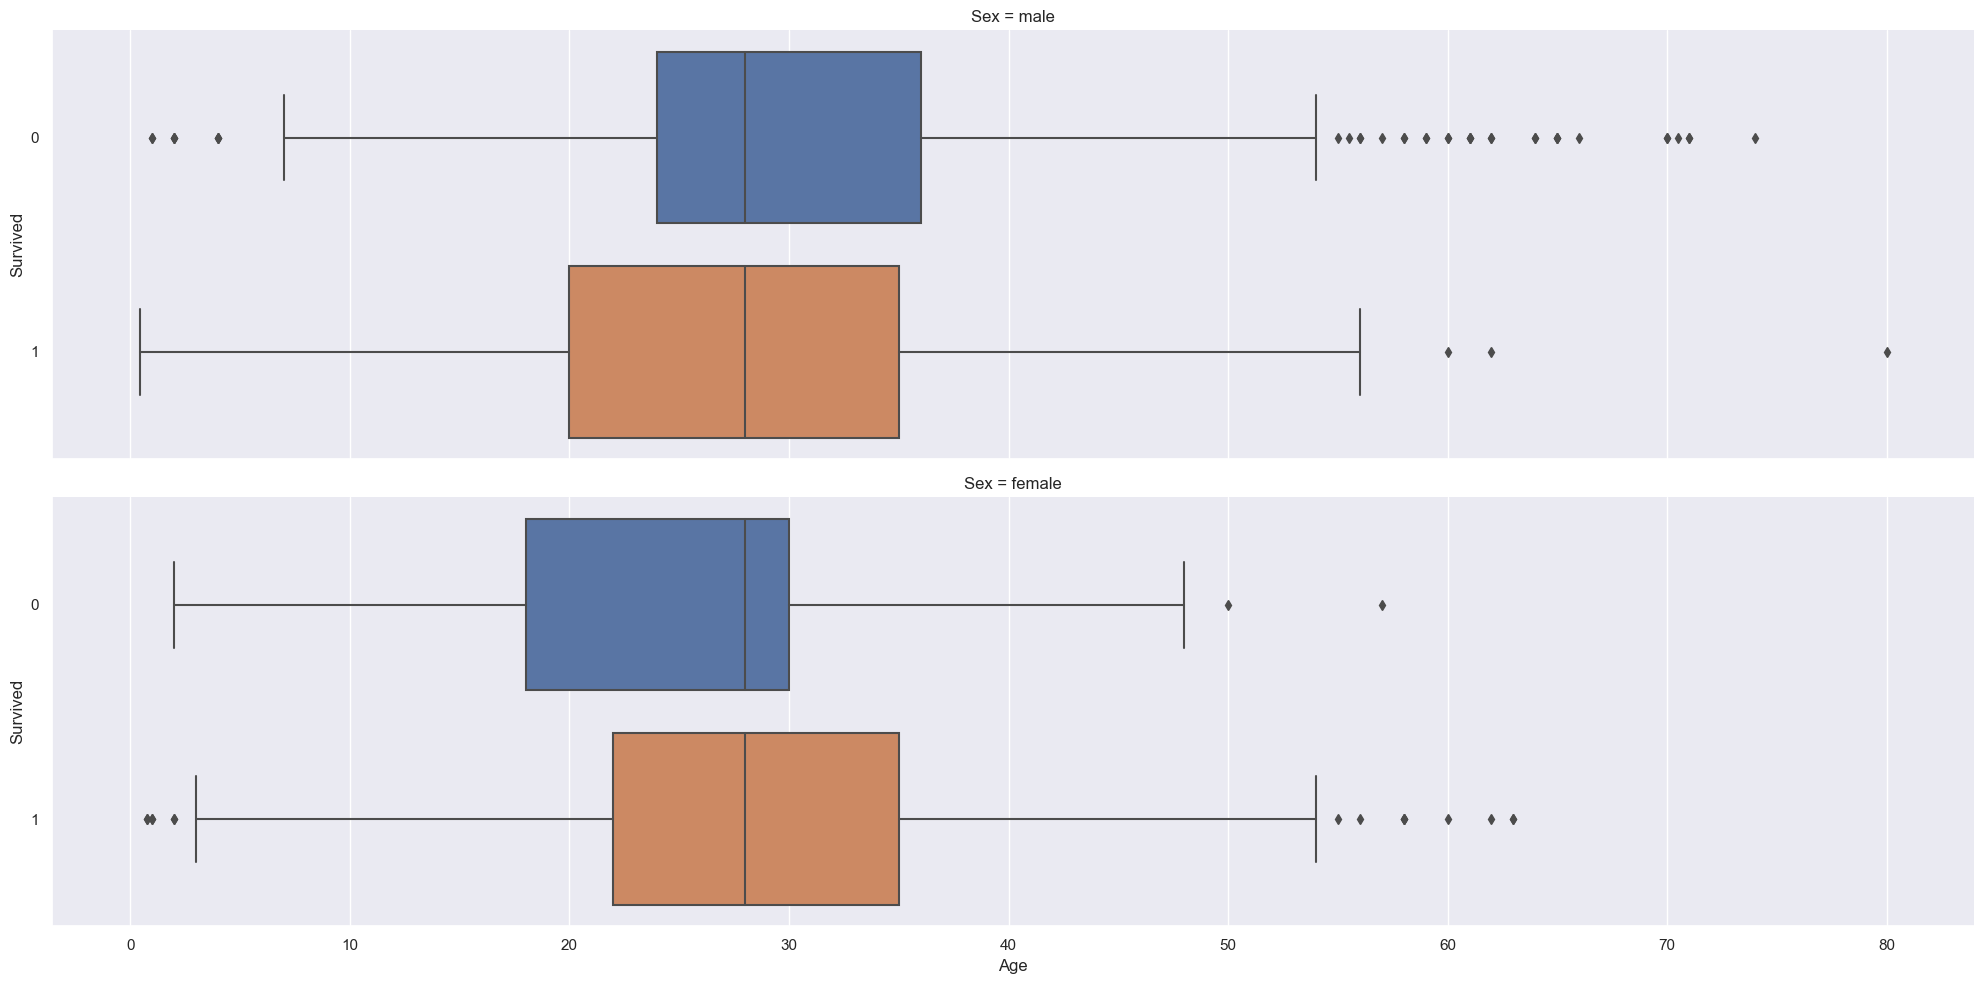

In [61]:
sb.catplot(x = 'Age', y = 'Survived', row = 'Sex', data = csv_data, kind = 'box', aspect = 4, orient = 'h')

We attempted to use both `Age` and `Sex` to verify if `Age` will be useful, but it does not seem so due to its similar median across all the boxplots.

As such, from the numeric variables, we have deduced the variables that would be predictors for machine learning which are: `Fare` and `Parch`.

In [62]:
num_predictors = csv_data[['Fare', 'Parch', 'Family_Size']]
num_predictors.head()

,Fare,Parch,Family_Size
0,7.2500,0,2
1,71.2833,0,2
2,7.9250,0,1
3,53.1000,0,2
4,8.0500,0,1


In [63]:
num_predictors.to_csv("datasets\\numeric-predictors.csv")

The dataframe containing only numeric predictors has been exported to the `numeric-predictors.csv` in the `datasets` folder.